In [51]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

In [52]:
df = pd.read_excel('data/Health Monitor Dataset.xlsx')
df.head()

,Dehydration,Medicine Overdose,Acidious,Cold,Cough,Dehydration.1,Medicine Overdose.1,Acidious.1,Cold .1,Cough.1,Type,Temperature,Heart Rate,Pulse,BPSYS,BPDIA,Respiratory Rate,Oxygen Saturation,PH,Causes Respiratory Imbalance
0,True,False,False,False,False,1,0,0,0,0,1,98,93,67,90,74,12,0.994164,8,Mild
1,False,False,True,False,True,0,0,1,0,1,2,98,185,160,100,74,47,0.913976,13,Severe
2,False,True,True,False,True,0,1,1,0,1,3,103,126,194,97,47,42,0.932465,10,Chronic
3,True,False,False,False,False,1,0,0,0,0,1,98,92,69,91,60,16,0.999605,8,Mild
4,True,True,True,False,True,1,1,1,0,1,4,105,197,115,106,87,39,0.971081,13,Chronic


In [54]:
col=df.columns.str.replace(' ','')
df.columns = col

In [55]:
df.head()

,Dehydration,MedicineOverdose,Acidious,Cold,Cough,Dehydration.1,MedicineOverdose.1,Acidious.1,Cold.1,Cough.1,Type,Temperature,HeartRate,Pulse,BPSYS,BPDIA,RespiratoryRate,OxygenSaturation,PH,CausesRespiratoryImbalance
0,True,False,False,False,False,1,0,0,0,0,1,98,93,67,90,74,12,0.994164,8,Mild
1,False,False,True,False,True,0,0,1,0,1,2,98,185,160,100,74,47,0.913976,13,Severe
2,False,True,True,False,True,0,1,1,0,1,3,103,126,194,97,47,42,0.932465,10,Chronic
3,True,False,False,False,False,1,0,0,0,0,1,98,92,69,91,60,16,0.999605,8,Mild
4,True,True,True,False,True,1,1,1,0,1,4,105,197,115,106,87,39,0.971081,13,Chronic


In [20]:
col=df.columns.str.replace('.1','')
df.columns = col

In [56]:
df.head()

,Dehydration,MedicineOverdose,Acidious,Cold,Cough,Dehydration.1,MedicineOverdose.1,Acidious.1,Cold.1,Cough.1,Type,Temperature,HeartRate,Pulse,BPSYS,BPDIA,RespiratoryRate,OxygenSaturation,PH,CausesRespiratoryImbalance
0,True,False,False,False,False,1,0,0,0,0,1,98,93,67,90,74,12,0.994164,8,Mild
1,False,False,True,False,True,0,0,1,0,1,2,98,185,160,100,74,47,0.913976,13,Severe
2,False,True,True,False,True,0,1,1,0,1,3,103,126,194,97,47,42,0.932465,10,Chronic
3,True,False,False,False,False,1,0,0,0,0,1,98,92,69,91,60,16,0.999605,8,Mild
4,True,True,True,False,True,1,1,1,0,1,4,105,197,115,106,87,39,0.971081,13,Chronic


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4286 entries, 0 to 4285
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Dehydration                 4286 non-null   bool   
 1   MedicineOverdose            4286 non-null   bool   
 2   Acidious                    4286 non-null   bool   
 3   Cold                        4286 non-null   bool   
 4   Cough                       4286 non-null   bool   
 5   Dehydration.1               4286 non-null   int64  
 6   MedicineOverdose.1          4286 non-null   int64  
 7   Acidious.1                  4286 non-null   int64  
 8   Cold.1                      4286 non-null   int64  
 9   Cough.1                     4286 non-null   int64  
 10  Type                        4286 non-null   int64  
 11  Temperature                 4286 non-null   int64  
 12  HeartRate                   4286 non-null   int64  
 13  Pulse                       4286 

In [28]:
df.dtypes

Dehydration                      bool
MedicineOverdose                 bool
Acidious                         bool
Cold                             bool
Cough                            bool
Dehydration                     int64
MedicineOverdose                int64
Acidious                        int64
Cold                            int64
Cough                           int64
Type                            int64
Temperature                     int64
HeartRate                       int64
Pulse                           int64
BPSYS                           int64
BPDIA                           int64
RespiratoryRate                 int64
OxygenSaturation              float64
PH                              int64
CausesRespiratoryImbalance     object
dtype: object

In [59]:
df.describe()

,Dehydration.1,MedicineOverdose.1,Acidious.1,Cold.1,Cough.1,Type,Temperature,HeartRate,Pulse,BPSYS,BPDIA,RespiratoryRate,OxygenSaturation,PH
count,4286.000000,4286.000000,4286.000000,4286.000000,4286.00000,4286.000000,4286.000000,4286.000000,4286.000000,4286.000000,4286.000000,4286.000000,4286.000000,4286.000000
mean,0.489267,0.500233,0.491834,0.478768,0.50280,2.462902,100.167989,115.208586,113.360243,101.327345,69.566496,28.911573,0.950482,7.534764
std,0.499943,0.500058,0.499992,0.499607,0.50005,1.120677,3.203449,43.326482,46.123845,5.379024,16.165556,16.211535,0.030227,3.608829
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,95.000000,50.000000,50.000000,90.000000,40.000000,6.000000,0.900010,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,2.000000,98.000000,77.000000,67.000000,97.000000,58.000000,14.000000,0.924190,5.000000
50%,0.000000,1.000000,0.000000,0.000000,1.00000,2.000000,99.000000,106.000000,108.000000,101.000000,69.000000,25.500000,0.949038,8.000000
75%,1.000000,1.000000,1.000000,1.000000,1.00000,3.000000,103.000000,152.000000,155.000000,104.000000,81.000000,43.000000,0.974621,10.000000
max,1.000000,1.000000,1.000000,1.000000,1.00000,5.000000,106.000000,200.000000,200.000000,120.000000,100.000000,60.000000,0.999997,14.000000


In [60]:
df["CausesRespiratoryImbalance"].value_counts()

Chronic    2085
Severe     1362
Mild        689
Normal      150
Name: CausesRespiratoryImbalance, dtype: int64

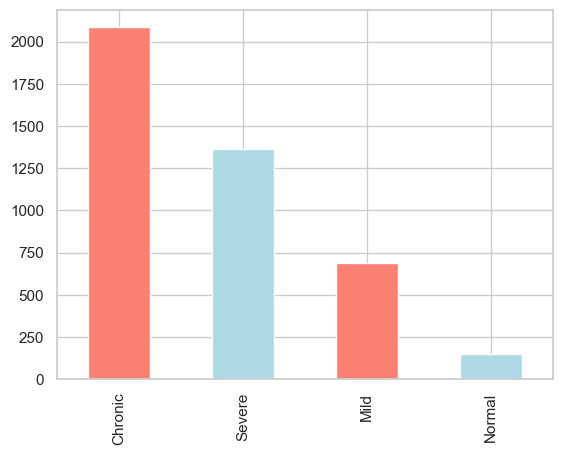

In [61]:
df["CausesRespiratoryImbalance"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

Chronic    2085
Severe     1362
Mild        689
Normal      150
Name: CausesRespiratoryImbalance, dtype: int64


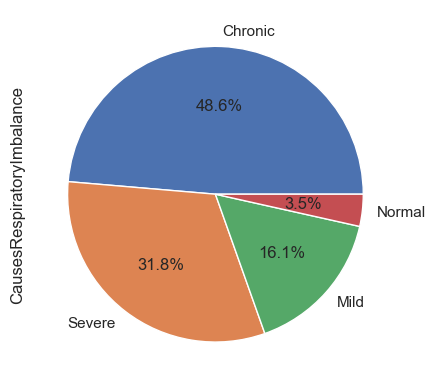

In [62]:
#Loan Status
df['CausesRespiratoryImbalance'].value_counts().plot(kind='pie',autopct='%1.1f%%')
print(df['CausesRespiratoryImbalance'].value_counts())

In [63]:
df.isna().sum()

Dehydration                   0
MedicineOverdose              0
Acidious                      0
Cold                          0
Cough                         0
Dehydration.1                 0
MedicineOverdose.1            0
Acidious.1                    0
Cold.1                        0
Cough.1                       0
Type                          0
Temperature                   0
HeartRate                     0
Pulse                         0
BPSYS                         0
BPDIA                         0
RespiratoryRate               0
OxygenSaturation              0
PH                            0
CausesRespiratoryImbalance    0
dtype: int64

In [64]:
df.corr()

,Dehydration,MedicineOverdose,Acidious,Cold,Cough,Dehydration.1,MedicineOverdose.1,Acidious.1,Cold.1,Cough.1,Type,Temperature,HeartRate,Pulse,BPSYS,BPDIA,RespiratoryRate,OxygenSaturation,PH
Dehydration,1.000000,-0.009325,-0.004085,0.016840,-0.025551,1.000000,-0.009325,-0.004085,0.016840,-0.025551,0.436231,0.070925,0.125167,0.143090,-0.098361,-0.016804,0.136612,-0.207855,-0.022947
MedicineOverdose,-0.009325,1.000000,0.017275,0.009828,-0.001869,-0.009325,1.000000,0.017275,0.009828,-0.001869,0.453306,0.070049,0.147685,0.159540,-0.105834,0.017565,0.149683,-0.232196,-0.018174
Acidious,-0.004085,0.017275,1.000000,0.009115,-0.016710,-0.004085,0.017275,1.000000,0.009115,-0.016710,0.448645,0.059866,0.132779,0.163761,-0.125043,0.002796,0.125398,-0.231175,0.002033
Cold,0.016840,0.009828,0.009115,1.000000,0.017052,0.016840,0.009828,0.009115,1.000000,0.017052,0.469382,0.087385,0.119800,0.184133,-0.122332,-0.004896,0.155721,-0.251617,-0.012469
Cough,-0.025551,-0.001869,-0.016710,0.017052,1.000000,-0.025551,-0.001869,-0.016710,0.017052,1.000000,0.434118,0.071675,0.116813,0.167698,-0.110920,0.010832,0.161344,-0.234767,-0.034195
Dehydration.1,1.000000,-0.009325,-0.004085,0.016840,-0.025551,1.000000,-0.009325,-0.004085,0.016840,-0.025551,0.436231,0.070925,0.125167,0.143090,-0.098361,-0.016804,0.136612,-0.207855,-0.022947
MedicineOverdose.1,-0.009325,1.000000,0.017275,0.009828,-0.001869,-0.009325,1.000000,0.017275,0.009828,-0.001869,0.453306,0.070049,0.147685,0.159540,-0.105834,0.017565,0.149683,-0.232196,-0.018174
Acidious.1,-0.004085,0.017275,1.000000,0.009115,-0.016710,-0.004085,0.017275,1.000000,0.009115,-0.016710,0.448645,0.059866,0.132779,0.163761,-0.125043,0.002796,0.125398,-0.231175,0.002033
Cold.1,0.016840,0.009828,0.009115,1.000000,0.017052,0.016840,0.009828,0.009115,1.000000,0.017052,0.469382,0.087385,0.119800,0.184133,-0.122332,-0.004896,0.155721,-0.251617,-0.012469
Cough.1,-0.025551,-0.001869,-0.016710,0.017052,1.000000,-0.025551,-0.001869,-0.016710,0.017052,1.000000,0.434118,0.071675,0.116813,0.167698,-0.110920,0.010832,0.161344,-0.234767,-0.034195


(19.5, -0.5)

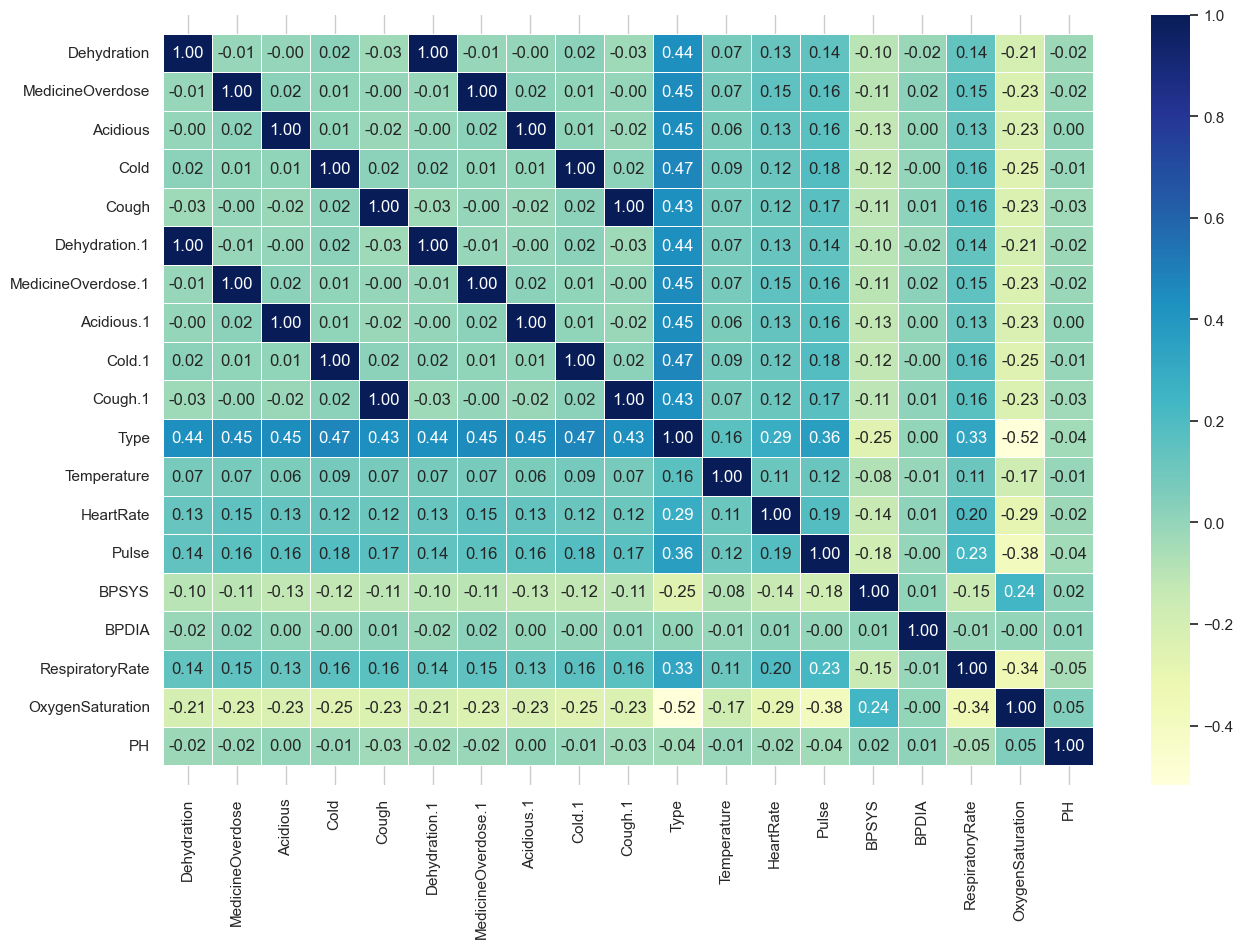

In [65]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [66]:
# let's check unique values
columns=df.columns
for col in columns:
    print(col,':\n',df[col].unique())
    print(df[col].value_counts())
    print('\n',20*'**','\n')

Dehydration :
 [ True False]
False    2189
True     2097
Name: Dehydration, dtype: int64

 **************************************** 

MedicineOverdose :
 [False  True]
True     2144
False    2142
Name: MedicineOverdose, dtype: int64

 **************************************** 

Acidious :
 [False  True]
False    2178
True     2108
Name: Acidious, dtype: int64

 **************************************** 

Cold :
 [False  True]
False    2234
True     2052
Name: Cold, dtype: int64

 **************************************** 

Cough :
 [False  True]
True     2155
False    2131
Name: Cough, dtype: int64

 **************************************** 

Dehydration.1 :
 [1 0]
0    2189
1    2097
Name: Dehydration.1, dtype: int64

 **************************************** 

MedicineOverdose.1 :
 [0 1]
1    2144
0    2142
Name: MedicineOverdose.1, dtype: int64

 **************************************** 

Acidious.1 :
 [0 1]
0    2178
1    2108
Name: Acidious.1, dtype: int64

 *************************

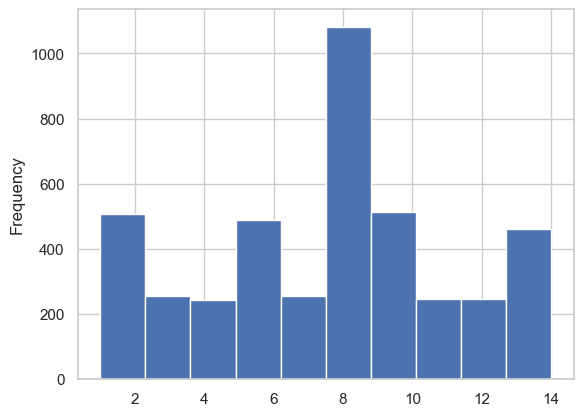

In [67]:
df.PH.plot.hist();

In [71]:
# #Loan Status
# df['BPSYS'].value_counts().plot(kind='pie',autopct='%1.1f%%')
print(df['BPSYS'].value_counts())

95     341
96     338
100    327
106    326
99     320
101    316
102    315
103    306
98     299
104    296
97     295
105    294
116     38
118     36
112     34
92      34
111     30
110     28
94      27
115     27
91      27
120     27
114     25
90      25
113     24
109     24
117     24
93      23
108     22
107     20
119     18
Name: BPSYS, dtype: int64


2    1362
3    1328
1     689
4     626
0     150
5     131
Name: Type, dtype: int64


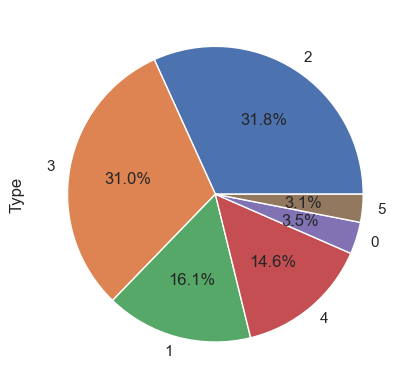

In [72]:
#Loan Status
df['Type'].value_counts().plot(kind='pie',autopct='%1.1f%%')
print(df['Type'].value_counts())

In [73]:
df

,Dehydration,MedicineOverdose,Acidious,Cold,Cough,Dehydration.1,MedicineOverdose.1,Acidious.1,Cold.1,Cough.1,Type,Temperature,HeartRate,Pulse,BPSYS,BPDIA,RespiratoryRate,OxygenSaturation,PH,CausesRespiratoryImbalance
0,True,False,False,False,False,1,0,0,0,0,1,98,93,67,90,74,12,0.994164,8,Mild
1,False,False,True,False,True,0,0,1,0,1,2,98,185,160,100,74,47,0.913976,13,Severe
2,False,True,True,False,True,0,1,1,0,1,3,103,126,194,97,47,42,0.932465,10,Chronic
3,True,False,False,False,False,1,0,0,0,0,1,98,92,69,91,60,16,0.999605,8,Mild
4,True,True,True,False,True,1,1,1,0,1,4,105,197,115,106,87,39,0.971081,13,Chronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4281,False,True,True,False,False,0,1,1,0,0,2,103,153,120,101,97,9,0.916403,4,Severe
4282,False,False,False,False,False,0,0,0,0,0,0,98,96,64,106,62,12,0.993931,8,Normal
4283,True,True,True,False,False,1,1,1,0,0,3,100,66,64,106,67,53,0.918334,6,Chronic
4284,True,False,True,True,True,1,0,1,1,1,4,97,145,188,106,67,8,0.922635,4,Chronic


In [74]:
# Split data into X and y
X = df.drop("CausesRespiratoryImbalance", axis=1)

y = df["CausesRespiratoryImbalance"]

In [76]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [77]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [78]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

C:\ProgramData\Anaconda3\envs\exp-tracking-env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.9417249417249417,
 'KNN': 0.5920745920745921,
 'Random Forest': 1.0}